In [6]:
# =====================================
# Cell 1: Import Libraries
# =====================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [5]:
# =====================================
# Cell 2: Load Dataset
# =====================================
# Load Iris dataset

iris = load_iris()
X = iris.data
y = iris.target

# Convert to DataFrame for better readability
df = pd.DataFrame(X, columns=iris.feature_names)
df['target'] = y

print("Iris Dataset Sample:")
df.head()

Iris Dataset Sample:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [7]:
# =====================================
# Cell 3: Train-Test Split
# =====================================

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training Samples: {X_train.shape[0]}, Testing Samples: {X_test.shape[0]}")


Training Samples: 120, Testing Samples: 30


In [8]:
# =====================================
# Cell 4: Build Decision Tree Model
# =====================================

model = DecisionTreeClassifier(
    criterion='gini',  # can also use 'entropy'
    max_depth=3,       # limit depth for easier visualization
    random_state=42
)

# Train the model
model.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=3, random_state=42)

In [10]:
# =====================================
# Cell 5: Model Evaluation
# =====================================

y_pred = model.predict(X_test)

# Accuracy
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.2f}")

Accuracy: 0.97


In [11]:
# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



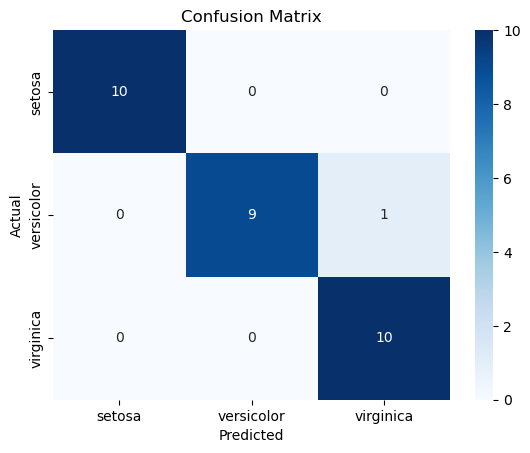

In [12]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=iris.target_names,
            yticklabels=iris.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

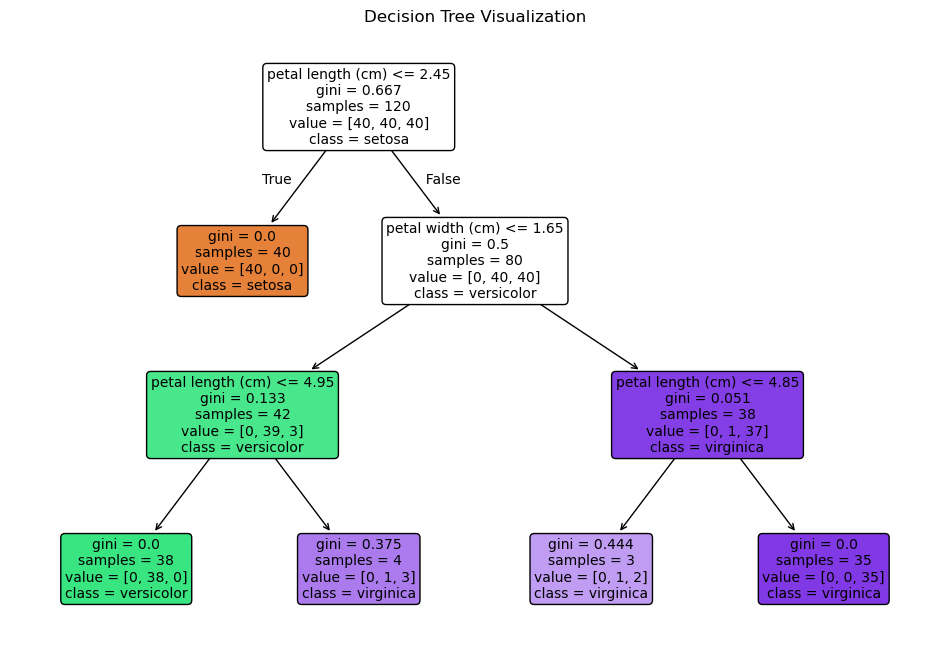

In [13]:
# =====================================
# Cell 6: Visualize Decision Tree
# =====================================

plt.figure(figsize=(12, 8))
plot_tree(
    model,
    feature_names=iris.feature_names,
    class_names=iris.target_names,
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree Visualization")
plt.show()


In [14]:
# =====================================
# Cell 7: Predict on New Data
# =====================================

new_data = [[5.0, 3.5, 1.5, 0.2]]  # Example input
prediction = model.predict(new_data)
print(f"Predicted Class for {new_data}: {iris.target_names[prediction[0]]}")


Predicted Class for [[5.0, 3.5, 1.5, 0.2]]: setosa
